In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# step 1: download P18 cruise data
df=pd.read_csv('33RO20161119_hy1.csv',skiprows=149)
df[df==-999]=np.nan
o2=df['OXYGEN'][1:-1] # oxygen
no3=df['NITRAT'][1:-1] # nitrate
dic=df['TCARBN'][1:-1] # total inorganic carbon
sil=df['SILCAT'][1:-1] # silicate
p=df['CTDPRS'][1:-1] # pressure
t=df['CTDTMP'][1:-1] # temperature
sp=df['CTDSAL'][1:-1] # salinity
stn=df['STNNBR'][1:-1] #Station identifier
lat=df['LATITUDE'][1:-1] #latitude
lon=df['LONGITUDE'][1:-1] # longitude 


,EXPOCODE,SECT_ID,STNNBR,CASTNO,SAMPNO,BTLNBR,BTLNBR_FLAG_W,DATE,TIME,LATITUDE,...,ALKALI_FLAG_W,PH_SWS,PH_SWS_FLAG_W,PH_TMP,POC,POC_FLAG_W,PON,PON_FLAG_W,SF6,SF6_FLAG_W
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,DEG C,UG/KG,NaN,UG/KG,NaN,PMOL/KG,NaN
1,33RO20161119,P18,1.0,3.0,1.0,11010.0,2.0,20161124.0,1417.0,22.6884,...,2.0,7.5127,2.0,25.00,-999.00,9.0,-999.00,9.0,0.0000,2.0
2,33RO20161119,P18,1.0,3.0,2.0,11101.0,2.0,20161124.0,1417.0,22.6884,...,2.0,7.4893,2.0,25.00,-999.00,9.0,-999.00,9.0,0.0031,2.0
3,33RO20161119,P18,1.0,3.0,3.0,11102.0,2.0,20161124.0,1417.0,22.6884,...,6.0,7.4699,2.0,25.00,-999.00,9.0,-999.00,9.0,-999.0,9.0
4,33RO20161119,P18,1.0,3.0,4.0,11103.0,2.0,20161124.0,1417.0,22.6884,...,2.0,7.4472,2.0,25.00,-999.00,9.0,-999.00,9.0,0.0112,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5096,33RO20161119,P18,212.0,1.0,21.0,11119.0,2.0,20170129.0,245.0,-68.0668,...,2.0,7.6345,2.0,25.00,-999.00,9.0,-999.00,9.0,-999.0,9.0
5097,33RO20161119,P18,212.0,1.0,22.0,11120.0,2.0,20170129.0,245.0,-68.0668,...,6.0,7.7148,2.0,25.00,-999.00,9.0,-999.00,9.0,-999.0,9.0
5098,33RO20161119,P18,212.0,1.0,23.0,11121.0,2.0,20170129.0,245.0,-68.0668,...,2.0,7.7181,6.0,25.00,-999.00,9.0,-999.00,9.0,-999.0,9.0
5099,33RO20161119,P18,212.0,1.0,24.0,11122.0,2.0,20170129.0,245.0,-68.0668,...,2.0,7.7020,2.0,25.00,-999.00,9.0,-999.00,9.0,-999.0,9.0


In [32]:
# change data type to float
t=t.astype(float)
p=p.astype(float)
sp=sp.astype(float)
o2=o2.astype(float)
no3=no3.astype(float)

In [31]:
type(o2.values[1])

numpy.float64

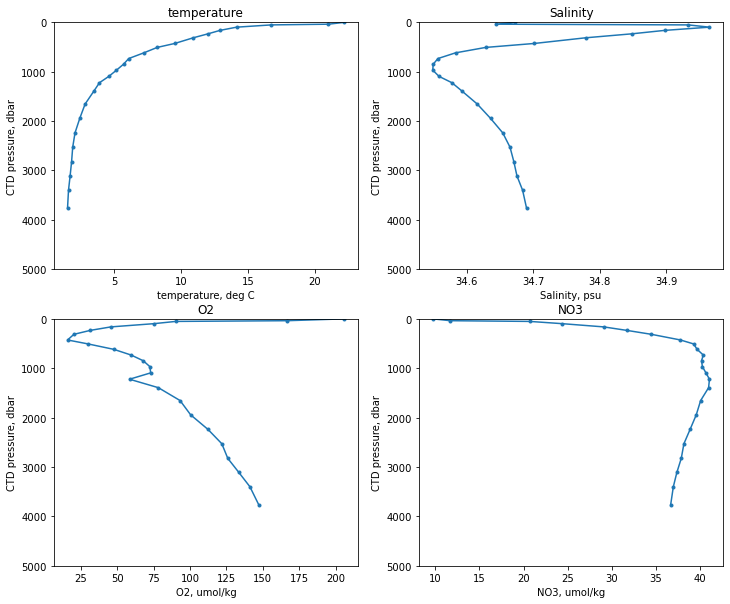

In [60]:
# quick look at a single station
ind = (stn==50)
plt.figure(figsize=(12,10))
# 
plt.subplot(221)
plt.plot(t[ind],p[ind],'.-')
plt.ylim([5000,0])
plt.xlabel('temperature, deg C')
plt.title('temperature')
plt.ylabel('CTD pressure, dbar')
# 
plt.subplot(222)
plt.plot(sp[ind],p[ind],'.-')
plt.ylim([5000,0])
plt.xlabel('Salinity, psu')
plt.title('Salinity')
plt.ylabel('CTD pressure, dbar')
# 
plt.subplot(223)
plt.plot(o2[ind],p[ind],'.-')
plt.ylim([5000,0])
plt.xlabel('O2, umol/kg')
plt.title('O2')
plt.ylabel('CTD pressure, dbar')
# 
plt.subplot(224)
plt.plot(no3[ind],p[ind],'.-')
plt.ylim([5000,0])
plt.xlabel('NO3, umol/kg')
plt.title('NO3')
plt.ylabel('CTD pressure, dbar')
plt.show()

### Can we use multiple linear regression to estimate NO3 as a function of (T,S,P,O2)?

In [61]:
# Use station #50 to train the model
ind=(stn==50)
N=np.size(t[ind])
A=np.ones((N,5))
A[:,0]=t[ind]
A[:,1]=sp[ind]
A[:,2]=p[ind]
A[:,3]=o2[ind]
b=no3[ind]
xvec=np.linalg.pinv(A)@b
xvec

array([-1.17185689e+00, -1.22167829e+01, -2.28285261e-04, -7.70352411e-02,
        4.74012816e+02])

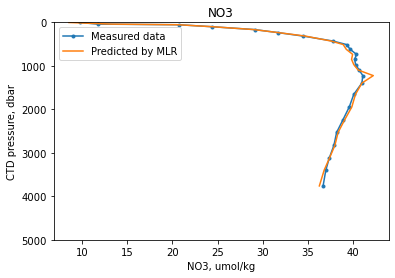

In [62]:
# plot the result
plt.plot(no3[ind],p[ind],'.-',label='Measured data')
plt.ylim([5000,0])
plt.xlabel('NO3, umol/kg')
plt.title('NO3')
plt.ylabel('CTD pressure, dbar')
plt.plot(A@xvec,p[ind],label='Predicted by MLR')
plt.legend()
plt.show()


In [21]:
stn.unique()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 15

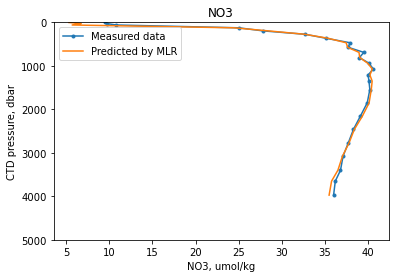

In [64]:
# validate using another site
# validation set data 
STN=60
ind = (stn==STN)
N=np.size(t[ind])
A=np.ones((N,5))
A[:,0]=t[ind]
A[:,1]=sp[ind]
A[:,2]=p[ind]
A[:,3]=o2[ind]

# plot the result
plt.plot(no3[ind],p[ind],'.-',label='Measured data')
plt.ylim([5000,0])
plt.xlabel('NO3, umol/kg')
plt.title('NO3')
plt.ylabel('CTD pressure, dbar')

# use the coefficient from previous model training
plt.plot(A@xvec,p[ind],label='Predicted by MLR')
plt.legend()
plt.show()
